In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sn
import scipy as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("census-income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.shape

(32560, 15)

There are 32560 rows and 15 columns

In [4]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


It gives the statistical data of the dateset

In [5]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

These are the data types of the each variables

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There is no missing values present in the dataset. String data need to be encoded. It is identified as classification problem.

In [7]:
df['Income'].unique() 

array([' <=50K', ' >50K'], dtype=object)

There are 2 unique values in df['Income'] that is <=50K and >50K.

In [8]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [9]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [10]:
for i in df.columns:
    print(df[i].value_counts())
    print("********************")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
********************
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
********************
203488    13
123011    13
164190    13
121124    12
148995    12
          ..
218551     1
201204     1
362999     1
162297     1
145522     1
Name: Fnlwgt, Length: 21647, dtype: int64
********************
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th   

There are no null values.  But ? is present in  Workclass, Occupation and Native_country we need to fill it.

In [11]:
df= df.replace(' ?', np.nan)

In [12]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [13]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [14]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

We can see that all ? replaced by values

# EDA

Univariate analysis

<AxesSubplot:xlabel='Income', ylabel='count'>

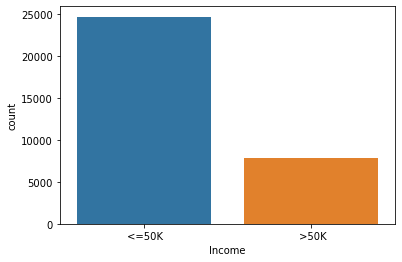

In [15]:
sn.countplot(df["Income"])

Two types of incomes are not equally distributed so there is imbalance isssue exists.

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:
df['Workclass']=le.fit_transform(df['Workclass'])
df['Education']=le.fit_transform(df['Education'])
df['Marital_status']=le.fit_transform(df['Marital_status'])
df['Education']=le.fit_transform(df['Education'])
df['Occupation']=le.fit_transform(df['Occupation'])
df['Relationship']=le.fit_transform(df['Relationship'])
df['Race']=le.fit_transform(df['Race'])
df['Sex']=le.fit_transform(df['Sex'])
df['Race']=le.fit_transform(df['Race'])
df['Native_country']=le.fit_transform(df['Native_country'])
df['Income']=le.fit_transform(df['Income'])

In [18]:
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int64
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int64
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

Converted all categorical values to the numerical values

In [19]:
import sklearn
sklearn.__version__

'0.24.1'

In [20]:
import numpy
numpy.__version__

'1.20.1'

In [21]:
dfx=df.drop(['Income'],axis=1)
dfy=df['Income']

In [22]:
from imblearn.over_sampling import SMOTE


In [23]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(dfx,dfy)

<AxesSubplot:xlabel='Income', ylabel='count'>

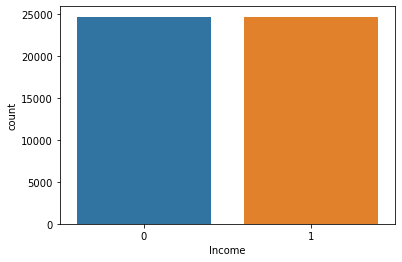

In [24]:
sn.countplot(trainy)

In [25]:
trainy.value_counts()

0    24719
1    24719
Name: Income, dtype: int64

Its balanced

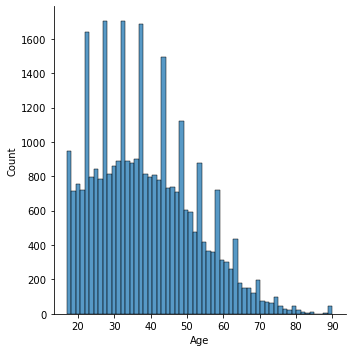

In [26]:
sn.displot(df["Age"])

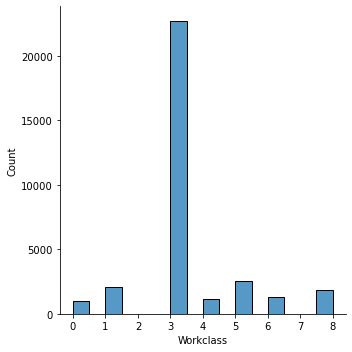

In [27]:
sn.displot(df["Workclass"])

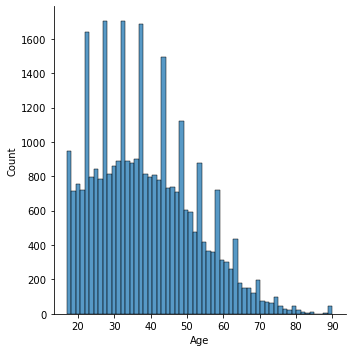

In [28]:
sn.displot(df["Age"])

Its right skewed

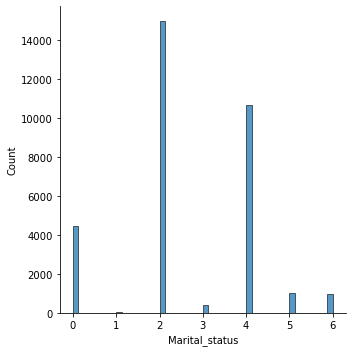

In [29]:
sn.displot(df["Marital_status"])

not normaly distributed

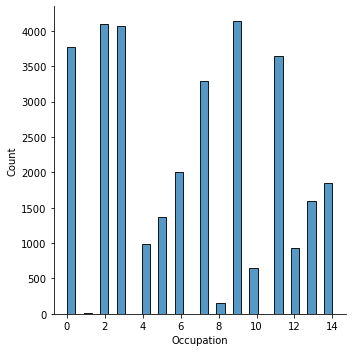

In [30]:
sn.displot(df["Occupation"])

not normaly distributed

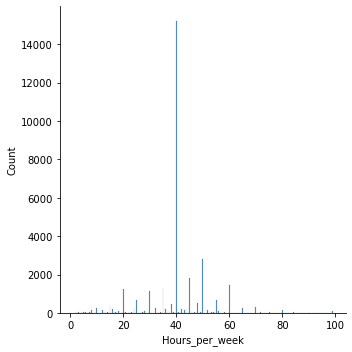

In [31]:
sn.displot(df["Hours_per_week"])

Almost normaly distributed

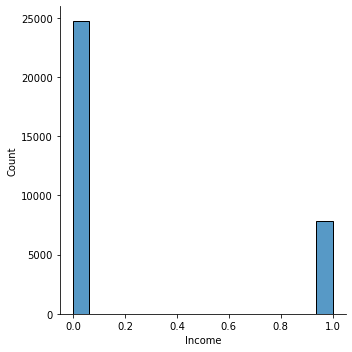

In [32]:
sn.displot(df["Income"])

not normaly distributed

# Bivariate analysis

<AxesSubplot:title={'center':'comparison between Workclass and age'}, xlabel='Age', ylabel='Workclass'>

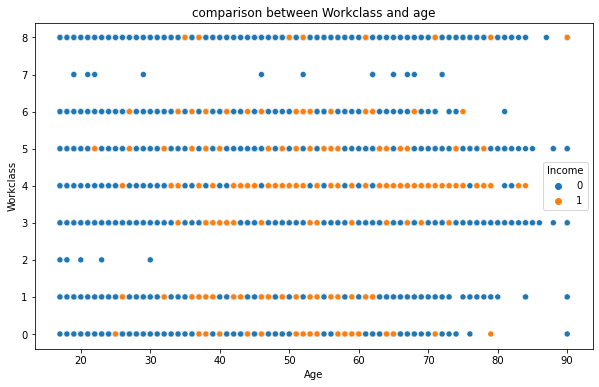

In [33]:
plt.figure(figsize=[10,6])
plt.title("comparison between Workclass and age")
sn.scatterplot(df['Age'],df['Workclass'],hue=df["Income"])

<AxesSubplot:title={'center':'comparison between Marital_status and Occupation'}, xlabel='Marital_status', ylabel='Occupation'>

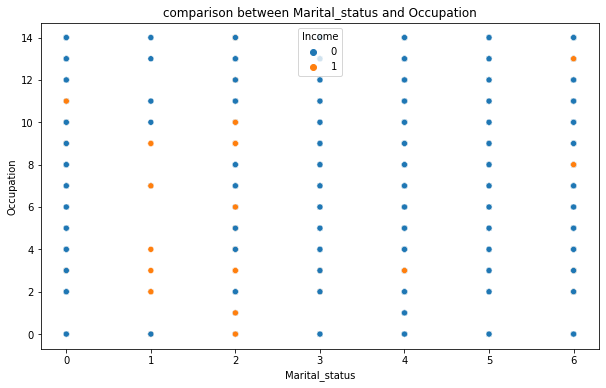

In [34]:
plt.figure(figsize=[10,6])
plt.title("comparison between Marital_status and Occupation")
sn.scatterplot(df['Marital_status'],df['Occupation'],hue=df["Income"])

It shows the distribution of martial status against occupation

<AxesSubplot:title={'center':'comparison between Capital_gain and Occupation'}, xlabel='Capital_gain', ylabel='Occupation'>

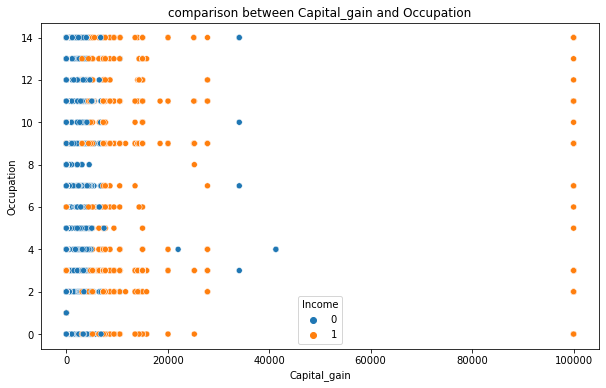

In [35]:
plt.figure(figsize=[10,6])
plt.title("comparison between Capital_gain and Occupation")
sn.scatterplot(df['Capital_gain'],df['Occupation'],hue=df["Income"])

It shows the distribution of martial status against occupation

<AxesSubplot:title={'center':'comparison between Marital_status and Income'}, xlabel='Marital_status', ylabel='Income'>

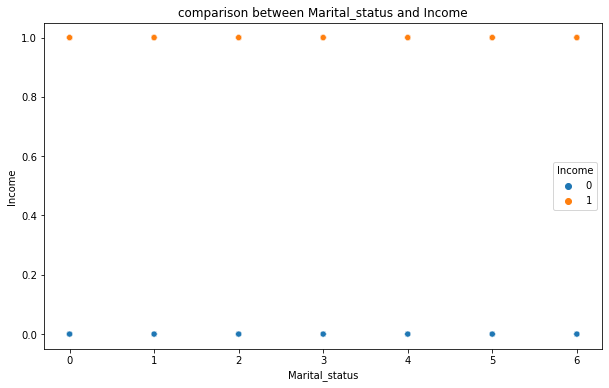

In [36]:
plt.figure(figsize=[10,6])
plt.title("comparison between Marital_status and Income")
sn.scatterplot(df['Marital_status'],df['Income'],hue=df["Income"])

It shows the distribution of martial status against income

<AxesSubplot:title={'center':'comparison between Capital_loss and Occupation'}, xlabel='Capital_loss', ylabel='Occupation'>

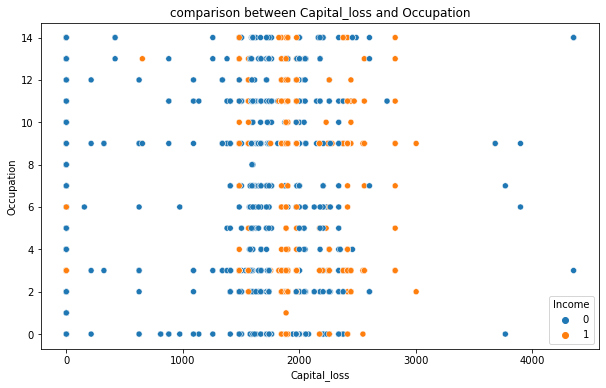

In [37]:
plt.figure(figsize=[10,6])
plt.title("comparison between Capital_loss and Occupation")
sn.scatterplot(df['Capital_loss'],df['Occupation'],hue=df["Income"])

It shows the distribution of Capital loss against occupation

<AxesSubplot:title={'center':'comparison between Marital_status and Income'}, xlabel='Marital_status', ylabel='Income'>

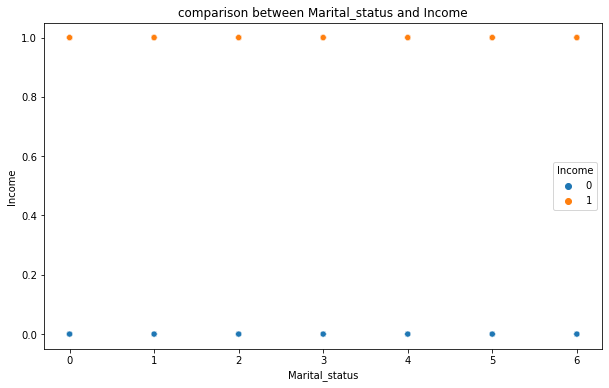

In [38]:
plt.figure(figsize=[10,6])
plt.title("comparison between Marital_status and Income")
sn.scatterplot(df['Marital_status'],df['Income'],hue=df["Income"])

It shows the distribution of martial status against income

<AxesSubplot:title={'center':'comparison between Hours_per_week and Income'}, xlabel='Hours_per_week', ylabel='Income'>

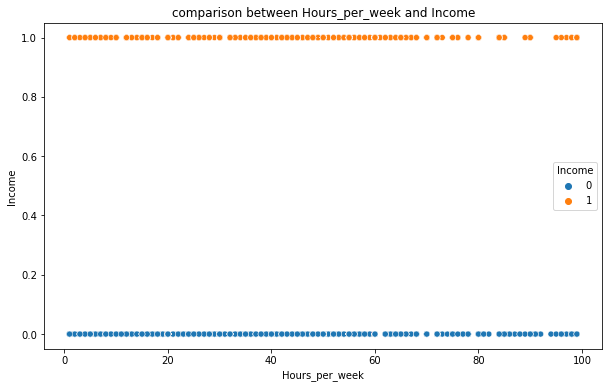

In [39]:
plt.figure(figsize=[10,6])
plt.title("comparison between Hours_per_week and Income")
sn.scatterplot(df['Hours_per_week'],df['Income'],hue=df["Income"])

It shows the distribution of house per work against income

<AxesSubplot:title={'center':'comparison between Education and Income'}, xlabel='Education', ylabel='Income'>

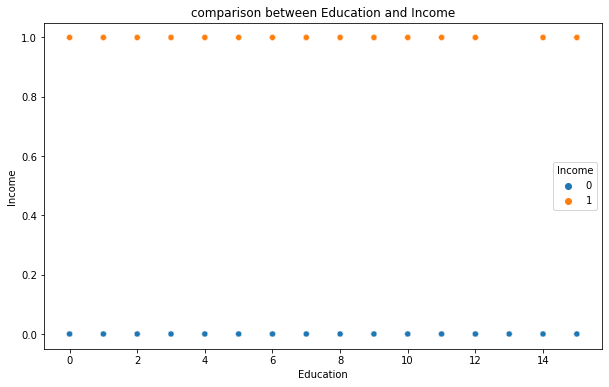

In [40]:
plt.figure(figsize=[10,6])
plt.title("comparison between Education and Income")
sn.scatterplot(df['Education'],df['Income'],hue=df["Income"])

It shows the distribution of education against income

In [41]:
cor=df.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.059424,-0.076646,-0.010508,0.036527,-0.266292,0.012628,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000176,0.234039
Workclass,0.059424,1.000000,-0.019111,-0.019358,-0.054412,0.042191,0.312611,0.012832,0.018893,0.002270,0.010680,-0.009878,-0.093413,0.001240,-0.055098
Fnlwgt,-0.076646,-0.019111,1.000000,-0.028156,-0.043159,0.028184,-0.000569,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.062703,-0.009481
Education,-0.010508,-0.019358,-0.028156,1.000000,0.359172,-0.038398,-0.046460,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.075189,0.079311
Education_num,0.036527,-0.054412,-0.043159,0.359172,1.000000,-0.069338,0.044150,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.090270,0.335182
Marital_status,-0.266292,0.042191,0.028184,-0.038398,-0.069338,1.000000,0.052891,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.020463,-0.199295
Occupation,0.012628,0.312611,-0.000569,-0.046460,0.044150,0.052891,1.000000,-0.014638,-0.009948,0.026149,0.012357,0.004530,-0.056999,-0.000467,0.010777
Relationship,-0.263698,0.012832,0.008922,-0.010879,-0.094145,0.185461,-0.014638,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010938,-0.250924
Race,0.028718,0.018893,-0.021278,0.014135,0.031825,-0.068025,-0.009948,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.111294,0.071853
Sex,0.088832,0.002270,0.026882,-0.027349,0.012256,-0.129337,0.026149,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.003007,0.215995


These are the correlation between the variables

<AxesSubplot:>

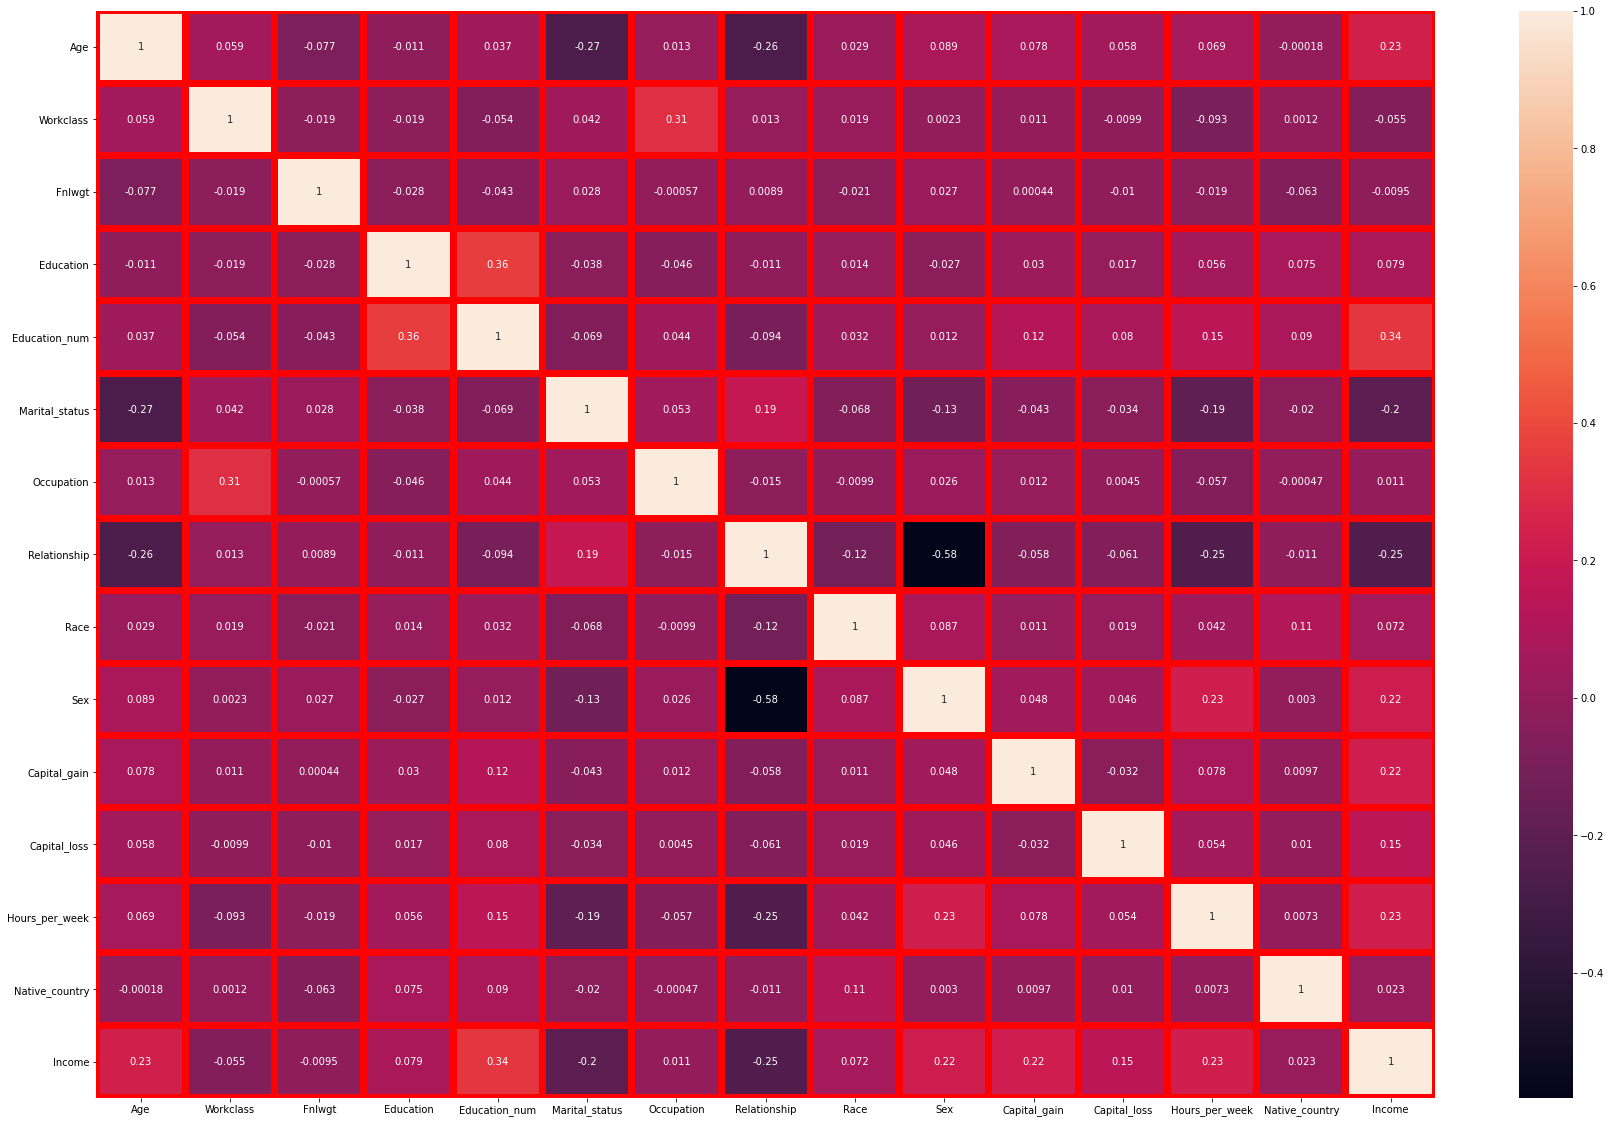

In [42]:
plt.figure(figsize=[30,20])
sn.heatmap(cor,annot=True,linewidths=6,linecolor='r')

This heatmap shows that all the variables are poisitively correlated with the target variable income.  But relationship and martial status very little negatively correlated the target variables.

(array([0., 1.]), [Text(0, 0, ''), Text(0, 0, '')])

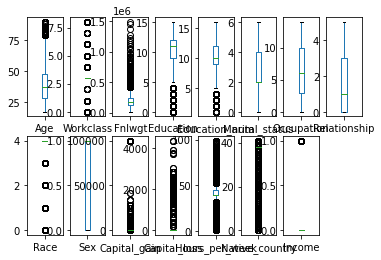

In [43]:
df.plot(kind="box",subplots=True,layout=(2,8))
plt.xticks(rotation=80)

We can see that except some columns other columns are having the outliers

# Outlier Remover

In [44]:
from scipy.stats import zscore

In [45]:
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [46]:
new_df.skew()

Age                0.484815
Workclass          1.183376
Fnlwgt             0.627839
Education         -0.955830
Education_num     -0.146241
Marital_status    -0.045497
Occupation         0.135730
Relationship       0.752998
Race              -2.587270
Sex               -0.688841
Capital_gain       4.930962
Capital_loss      29.521477
Hours_per_week    -0.359723
Native_country    -5.179023
Income             1.323412
dtype: float64

There are skewness present in all the columns except 'Education_num','Marital_status,Occupation','Hours_per_week'.

In [47]:
from sklearn.preprocessing import power_transform

In [48]:
new_df[['Age','Workclass','Fnlwgt','Education','Relationship','Race','Sex','Capital_gain','Capital_loss','Native_country','Income']]=power_transform(new_df[['Age','Workclass','Fnlwgt','Education','Relationship','Race','Sex','Capital_gain','Capital_loss','Native_country','Income']])

In [49]:
new_df.skew()

Age               -0.018116
Workclass          0.137669
Fnlwgt            -0.034501
Education         -0.313405
Education_num     -0.146241
Marital_status    -0.045497
Occupation         0.135730
Relationship       0.109542
Race              -2.524683
Sex               -0.688841
Capital_gain       3.068452
Capital_loss      24.788464
Hours_per_week    -0.359723
Native_country     1.307405
Income             1.323412
dtype: float64

Removed the skewness from most of the columns and reduced in few columns

In [50]:
new_df['Race'] = np.cbrt(new_df['Race'])

In [51]:
new_df['Sex'] = np.cbrt(new_df['Sex'])

In [52]:
new_df['Capital_gain'] = np.cbrt(new_df['Capital_gain'])

In [53]:
new_df['Capital_loss'] = np.cbrt(new_df['Capital_loss'])

In [54]:
new_df['Native_country'] = np.cbrt(new_df['Native_country'])

In [55]:
new_df['Income'] = np.cbrt(new_df['Income'])

In [56]:
new_df.skew()

Age               -0.018116
Workclass          0.137669
Fnlwgt            -0.034501
Education         -0.313405
Education_num     -0.146241
Marital_status    -0.045497
Occupation         0.135730
Relationship       0.109542
Race              -2.524609
Sex               -0.688841
Capital_gain       3.068452
Capital_loss      24.788464
Hours_per_week    -0.359723
Native_country    -2.652815
Income             1.323412
dtype: float64

# Dividing Data into x and y

Treating income as a target and treating like classification

In [57]:
x=new_df.drop(["Income"],axis=1)
y=new_df['Income']

In [58]:
x.shape

(27783, 14)

In [59]:
y.shape

(27783,)

In [60]:
new_df["Income"].dtype

dtype('float64')

# scaling

In [61]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

Done the scaling of the data

# Splitting the Data for Training and Testing

In [62]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Find the best random states use here

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)

In [64]:
x_train.shape

(20281, 14)

In [65]:
x_test.shape

(7502, 14)

In [66]:
y_train.shape

(20281,)

In [67]:
y_test.shape

(7502,)

In [68]:
trainy.value_counts()

0    24719
1    24719
Name: Income, dtype: int64

# Model building

In [69]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.27,random_state=42)

# LogisticRegression

In [70]:
LR=LogisticRegression()

In [71]:
LR.fit(x_train,y_train)
LR_predicted=LR.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",LR.score(x_train,y_train))
print("Test accuracy::",LR.score(x_test,y_test))

0.6640946887407296
[[4777 1882]
 [2602 4088]]
              precision    recall  f1-score   support

           0       0.65      0.72      0.68      6659
           1       0.68      0.61      0.65      6690

    accuracy                           0.66     13349
   macro avg       0.67      0.66      0.66     13349
weighted avg       0.67      0.66      0.66     13349

Training accuracy:: 0.6662417911274904
Test accuracy:: 0.6640946887407296


got the accuracy as 70%

# DecisionTreeClassifier

In [72]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [73]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8548954977900967
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      6659
           1       0.85      0.86      0.86      6690

    accuracy                           0.85     13349
   macro avg       0.86      0.85      0.85     13349
weighted avg       0.86      0.85      0.85     13349



Got the accuracy as 86%

# KNeighborsClassifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(classification_report(y_test,predknn))

0.7085924039253877
              precision    recall  f1-score   support

           0       0.73      0.66      0.69      6659
           1       0.69      0.76      0.72      6690

    accuracy                           0.71     13349
   macro avg       0.71      0.71      0.71     13349
weighted avg       0.71      0.71      0.71     13349



# RandomForestClassifier

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [76]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.8911528953479662
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      6659
           1       0.89      0.89      0.89      6690

    accuracy                           0.89     13349
   macro avg       0.89      0.89      0.89     13349
weighted avg       0.89      0.89      0.89     13349



Got the accuracy as 89%

# SVC

In [77]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')#It is a type of kernel we have aligned. Rbf is radial basis function.
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.5900067420780583
              precision    recall  f1-score   support

           0       0.55      0.98      0.71      6659
           1       0.93      0.20      0.33      6690

    accuracy                           0.59     13349
   macro avg       0.74      0.59      0.52     13349
weighted avg       0.74      0.59      0.52     13349



Got the accuracy as 59%

# Cross validation

In [78]:
print(cross_val_score(dtc,trainx,trainy,cv=5).mean())

0.8467592738069637


In [79]:
print(cross_val_score(svc,trainx,trainy,cv=5).mean())

0.5918120207372434


In [80]:
print(cross_val_score(rfc,trainx,trainy,cv=5).mean())

0.8858386539743763


In [81]:
print(cross_val_score(knn,trainx,trainy,cv=5).mean())

0.7228653034958461


Difference between dtc is 0,svc is 1, knn is 3, and rfc is 0. So RandomForesClassifier and DecisionTreeClassifier is having best accuracy and its giving the best model also.

# Hyper parameter tunning

In [82]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [83]:
parameter={'max_depth':np.arange(2,10),
          'criterion':['gini','entropy'],
          'splitter':['best','random'],
          'max_features':['auto','sqrt','log2']}

created the parameter list

In [84]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [85]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [86]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'log2',
 'splitter': 'best'}

These are the best parameters

In [87]:
final_model=DecisionTreeClassifier(criterion='gini',max_depth= 9, max_features='sqrt',splitter= 'best')
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print (accuracy*100)

84.50820286163757


So here got the best model with DecisionTreeClassifier with accuracy 82.2. We used the parmeters criterion='gini',max_depth= 9, max_features='sqrt',splitter= 'best'

# Ploltting AOC RUC CURVE

In [88]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [89]:
y_pred_prob=dtc.predict_proba(x_test)[:,1]

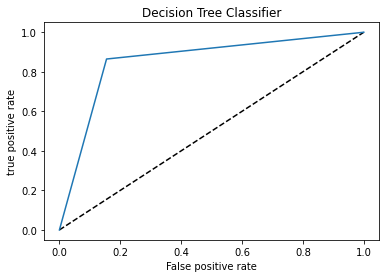

0.8548729693856455

In [90]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob) 
plt.plot([0,1],[0,1],'k--') 
plt.plot(fpr,tpr,label="Decision Tree Classifier")
plt.xlabel('False positive rate')
plt.ylabel('true positive rate') 
plt.title('Decision Tree Classifier')
plt.show() 
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

plotted the AOC RUC Curve . Got the accuracy as 85%

# Saving the model

In [91]:
import joblib
joblib.dump(final_model,"Final Model Census.pkl")

['Final Model Census.pkl']

Saved the model